# PANDAS TUTORIAL (QUICK TOUR-10 MINUTES)

This is a short introduction to `pandas`, geared mainly for new users.

Customarily, we import as follow:

In [1]:
import numpy as np
import pandas as pd

## Object Creation

Creating a **Series** by passing a list of values, letting `pandas` create a default integer index.

In [2]:
s = pd.Series([1, 2, -7, 10, np.nan, 8, 11])
s

0     1.0
1     2.0
2    -7.0
3    10.0
4     NaN
5     8.0
6    11.0
dtype: float64

Creating a **DataFrame** by passing a `NumPy` array, with datetime index and labeled columns.

In [3]:
dates = pd.date_range("20220319", periods=7)
dates

DatetimeIndex(['2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(7, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2022-03-19,0.762224,-1.732843,-1.495853,1.008874
2022-03-20,-0.164790,-0.952079,0.559604,0.089300
2022-03-21,-0.142070,2.069204,1.025956,-0.583214
2022-03-22,-0.124626,-0.779751,-1.292503,0.529144
2022-03-23,-1.349510,1.266786,-1.975675,-1.373446
2022-03-24,-0.925852,0.766193,-1.217168,0.767000
2022-03-25,0.655130,0.623870,0.127673,1.303692


Create a **DataFrame** by passing a *dictionary* of objects that can be converted into a series-like structure.

In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.5,
        "B": pd.Timestamp("20220319"),
        "C": pd.Series(1, index=list(range(4)), dtype=np.float32),
        "D": np.array([5] * 4, dtype=np.int32),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.5,2022-03-19,1.0,5,test,foo
1,1.5,2022-03-19,1.0,5,train,foo
2,1.5,2022-03-19,1.0,5,test,foo
3,1.5,2022-03-19,1.0,5,train,foo


The columns of the resulting **DataFrame** have different `dtypes`.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

Here is how to view the top and bottom rows of the frame.

In [7]:
df.head()

,A,B,C,D
2022-03-19,0.762224,-1.732843,-1.495853,1.008874
2022-03-20,-0.164790,-0.952079,0.559604,0.089300
2022-03-21,-0.142070,2.069204,1.025956,-0.583214
2022-03-22,-0.124626,-0.779751,-1.292503,0.529144
2022-03-23,-1.349510,1.266786,-1.975675,-1.373446


In [8]:
df.tail()

,A,B,C,D
2022-03-21,-0.142070,2.069204,1.025956,-0.583214
2022-03-22,-0.124626,-0.779751,-1.292503,0.529144
2022-03-23,-1.349510,1.266786,-1.975675,-1.373446
2022-03-24,-0.925852,0.766193,-1.217168,0.767000
2022-03-25,0.655130,0.623870,0.127673,1.303692


> You can pass arguments to the `head()` or `tail()` functions to display a specified number of rows.

In [9]:
df.head(2)

,A,B,C,D
2022-03-19,0.762224,-1.732843,-1.495853,1.008874
2022-03-20,-0.164790,-0.952079,0.559604,0.089300


Display the index, columns.

In [10]:
df.index

DatetimeIndex(['2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

> `DataFrame.to_numpy()` gives a `NumPy` representation of the underlying data. Note that this can be an expensive operation when your `DataFrame` has columns with *different* data types, which comes down to a fundamental difference between pandas and `NumPy`: `NumPy` arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call `DataFrame.to_numpy()`, pandas will find the `NumPy` dtype that can hold all of the dtypes in the `DataFrame`. This may end up being object, which requires casting every value to a Python object.

For `df`, our **DataFrame** of all floating-point values, `DataFrame.to_numpy()` is fast and doesn't require copying data

In [12]:
df.to_numpy()

array([[ 0.76222441, -1.73284312, -1.49585275,  1.00887352],
       [-0.1647903 , -0.95207859,  0.55960415,  0.08930033],
       [-0.14207033,  2.06920385,  1.02595634, -0.58321413],
       [-0.12462578, -0.77975108, -1.29250274,  0.52914364],
       [-1.34950966,  1.2667862 , -1.97567458, -1.37344605],
       [-0.92585189,  0.76619341, -1.21716787,  0.76700033],
       [ 0.6551304 ,  0.62387011,  0.12767267,  1.30369236]])

For `df2`, the **DataFrame** with multiply `dtypes`, `DataFrame.to_numpy()` is relative expensive.

In [13]:
df2.to_numpy()

array([[1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'test', 'foo'],
       [1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'train', 'foo'],
       [1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'test', 'foo'],
       [1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'train', 'foo']],
      dtype=object)

`describe()` shows a quick statistic summary of your data.

In [14]:
df.describe()

,A,B,C,D
count,7.000000,7.000000,7.000000,7.000000
mean,-0.184213,0.180197,-0.609709,0.248764
std,0.765277,1.363362,1.159939,0.947541
min,-1.349510,-1.732843,-1.975675,-1.373446
25%,-0.545321,-0.865915,-1.394178,-0.246957
50%,-0.142070,0.623870,-1.217168,0.529144
75%,0.265252,1.016490,0.343638,0.887937
max,0.762224,2.069204,1.025956,1.303692


In [15]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.5,1.0,5.0
std,0.0,0.0,0.0
min,1.5,1.0,5.0
25%,1.5,1.0,5.0
50%,1.5,1.0,5.0
75%,1.5,1.0,5.0
max,1.5,1.0,5.0


Transposing your data.

In [16]:
df.T

,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25
A,0.762224,-0.164790,-0.142070,-0.124626,-1.349510,-0.925852,0.655130
B,-1.732843,-0.952079,2.069204,-0.779751,1.266786,0.766193,0.623870
C,-1.495853,0.559604,1.025956,-1.292503,-1.975675,-1.217168,0.127673
D,1.008874,0.089300,-0.583214,0.529144,-1.373446,0.767000,1.303692


Sorting by an **axis**

In [17]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2022-03-25,0.655130,0.623870,0.127673,1.303692
2022-03-24,-0.925852,0.766193,-1.217168,0.767000
2022-03-23,-1.349510,1.266786,-1.975675,-1.373446
2022-03-22,-0.124626,-0.779751,-1.292503,0.529144
2022-03-21,-0.142070,2.069204,1.025956,-0.583214
2022-03-20,-0.164790,-0.952079,0.559604,0.089300
2022-03-19,0.762224,-1.732843,-1.495853,1.008874


In [18]:
df.sort_index(axis=1, ascending=False)


,D,C,B,A
2022-03-19,1.008874,-1.495853,-1.732843,0.762224
2022-03-20,0.089300,0.559604,-0.952079,-0.164790
2022-03-21,-0.583214,1.025956,2.069204,-0.142070
2022-03-22,0.529144,-1.292503,-0.779751,-0.124626
2022-03-23,-1.373446,-1.975675,1.266786,-1.349510
2022-03-24,0.767000,-1.217168,0.766193,-0.925852
2022-03-25,1.303692,0.127673,0.623870,0.655130


Sorting by values.

In [19]:
df.sort_values(by="B")

,A,B,C,D
2022-03-19,0.762224,-1.732843,-1.495853,1.008874
2022-03-20,-0.164790,-0.952079,0.559604,0.089300
2022-03-22,-0.124626,-0.779751,-1.292503,0.529144
2022-03-25,0.655130,0.623870,0.127673,1.303692
2022-03-24,-0.925852,0.766193,-1.217168,0.767000
2022-03-23,-1.349510,1.266786,-1.975675,-1.373446
2022-03-21,-0.142070,2.069204,1.025956,-0.583214


## Selection

### Getting

Selecting a single column, which yeild a `Series`, equivalent to `df.A`.

In [20]:
print("df.A", df.A, sep="\n")
print("="*30)
print("df[\"A\"]", df["A"], sep="\n")

df.A
2022-03-19    0.762224
2022-03-20   -0.164790
2022-03-21   -0.142070
2022-03-22   -0.124626
2022-03-23   -1.349510
2022-03-24   -0.925852
2022-03-25    0.655130
Freq: D, Name: A, dtype: float64
df["A"]
2022-03-19    0.762224
2022-03-20   -0.164790
2022-03-21   -0.142070
2022-03-22   -0.124626
2022-03-23   -1.349510
2022-03-24   -0.925852
2022-03-25    0.655130
Freq: D, Name: A, dtype: float64


Selecting via `[]`, which slicing the rows.

In [21]:
df[0:3]

,A,B,C,D
2022-03-19,0.762224,-1.732843,-1.495853,1.008874
2022-03-20,-0.164790,-0.952079,0.559604,0.089300
2022-03-21,-0.142070,2.069204,1.025956,-0.583214


In [22]:
df["20220319":"20220321"]

,A,B,C,D
2022-03-19,0.762224,-1.732843,-1.495853,1.008874
2022-03-20,-0.164790,-0.952079,0.559604,0.089300
2022-03-21,-0.142070,2.069204,1.025956,-0.583214


## Selection by label

For getting a cross section using a label.

In [23]:
df.loc[dates[0]]

A    0.762224
B   -1.732843
C   -1.495853
D    1.008874
Name: 2022-03-19 00:00:00, dtype: float64

Selecting on a multi-axis by label.

In [24]:
df.loc[:, ["A", "B"]]

,A,B
2022-03-19,0.762224,-1.732843
2022-03-20,-0.164790,-0.952079
2022-03-21,-0.142070,2.069204
2022-03-22,-0.124626,-0.779751
2022-03-23,-1.349510,1.266786
2022-03-24,-0.925852,0.766193
2022-03-25,0.655130,0.623870


Showing label slicing, both endpoints are included.

In [25]:
df.loc["20220319":"20220321", ["C", "D"]]

,C,D
2022-03-19,-1.495853,1.008874
2022-03-20,0.559604,0.089300
2022-03-21,1.025956,-0.583214


Reduction in the dimensions of returned object.

In [26]:
df.loc["20220324", ["B", "C"]]

B    0.766193
C   -1.217168
Name: 2022-03-24 00:00:00, dtype: float64

For getting a scalar value.

In [27]:
df.loc[dates[1], "A"]

-0.16479029797729877

For getting fast access to a scalar (equivalent to the prior method).

In [28]:
df.at[dates[1], "A"]

-0.16479029797729877

## Selection by position

Select via the position of the passed integers.

In [29]:
df.iloc[3]
# equivalent to df.loc[dates[3]]

A   -0.124626
B   -0.779751
C   -1.292503
D    0.529144
Name: 2022-03-22 00:00:00, dtype: float64

By integer slices, acting similar to `Numpy/Python`.

In [30]:
df.iloc[3:5, 0:2]
# equivalent to df.loc["20220322":"20220323", ["A", "B"]]

,A,B
2022-03-22,-0.124626,-0.779751
2022-03-23,-1.349510,1.266786


By list of integer position locations, similar to the `Numpy/Python` style.

In [31]:
df.iloc[[1, 2, 4], [0, 2]]
# equivalent to df.loc["20220320":"20220323", ["B", "C"]]

,A,C
2022-03-20,-0.16479,0.559604
2022-03-21,-0.14207,1.025956
2022-03-23,-1.34951,-1.975675


For slicing rows explicitly.

In [32]:
df.iloc[1:3, :]

,A,B,C,D
2022-03-20,-0.16479,-0.952079,0.559604,0.089300
2022-03-21,-0.14207,2.069204,1.025956,-0.583214


For slicing columns explicitly.

In [33]:
df.iloc[:, 1:3]

,B,C
2022-03-19,-1.732843,-1.495853
2022-03-20,-0.952079,0.559604
2022-03-21,2.069204,1.025956
2022-03-22,-0.779751,-1.292503
2022-03-23,1.266786,-1.975675
2022-03-24,0.766193,-1.217168
2022-03-25,0.623870,0.127673


For getting a value explicitly.

In [34]:
df.iloc[1, 1]

-0.9520785932011266

For getting fast access to a scalar (equivalent to the prior method).

In [35]:
df.iat[1, 1]

-0.9520785932011266

## Boolean indexing

Using a single column's values to select data.

In [36]:
df[df["A"] > 0]

,A,B,C,D
2022-03-19,0.762224,-1.732843,-1.495853,1.008874
2022-03-25,0.655130,0.623870,0.127673,1.303692


Selecting values from a **DataFrame** where a boolean condition is met.

In [37]:
df[df > 0]

,A,B,C,D
2022-03-19,0.762224,NaN,NaN,1.008874
2022-03-20,NaN,NaN,0.559604,0.089300
2022-03-21,NaN,2.069204,1.025956,NaN
2022-03-22,NaN,NaN,NaN,0.529144
2022-03-23,NaN,1.266786,NaN,NaN
2022-03-24,NaN,0.766193,NaN,0.767000
2022-03-25,0.655130,0.623870,0.127673,1.303692


Using `isin()` method for filtering.

In [38]:
df_copy = df.copy()
df_copy["E"] = ["one", "two", "three", "four", "five", "six", "seven"]
df_copy

,A,B,C,D,E
2022-03-19,0.762224,-1.732843,-1.495853,1.008874,one
2022-03-20,-0.164790,-0.952079,0.559604,0.089300,two
2022-03-21,-0.142070,2.069204,1.025956,-0.583214,three
2022-03-22,-0.124626,-0.779751,-1.292503,0.529144,four
2022-03-23,-1.349510,1.266786,-1.975675,-1.373446,five
2022-03-24,-0.925852,0.766193,-1.217168,0.767000,six
2022-03-25,0.655130,0.623870,0.127673,1.303692,seven


In [39]:
df_copy[df_copy["E"].isin(["three", "six"])]

,A,B,C,D,E
2022-03-21,-0.142070,2.069204,1.025956,-0.583214,three
2022-03-24,-0.925852,0.766193,-1.217168,0.767000,six


## Setting

Setting a new column automatically aligns the data by the indexes.

In [40]:
s1 = pd.Series(list(range(1, 8)), index=pd.date_range("20220319", periods=7))
s1

2022-03-19    1
2022-03-20    2
2022-03-21    3
2022-03-22    4
2022-03-23    5
2022-03-24    6
2022-03-25    7
Freq: D, dtype: int64

In [41]:
df["F"] = s1
df

,A,B,C,D,F
2022-03-19,0.762224,-1.732843,-1.495853,1.008874,1
2022-03-20,-0.164790,-0.952079,0.559604,0.089300,2
2022-03-21,-0.142070,2.069204,1.025956,-0.583214,3
2022-03-22,-0.124626,-0.779751,-1.292503,0.529144,4
2022-03-23,-1.349510,1.266786,-1.975675,-1.373446,5
2022-03-24,-0.925852,0.766193,-1.217168,0.767000,6
2022-03-25,0.655130,0.623870,0.127673,1.303692,7


Setting values by label.

In [42]:
df.at[dates[0], "A"] = 0
df

,A,B,C,D,F
2022-03-19,0.000000,-1.732843,-1.495853,1.008874,1
2022-03-20,-0.164790,-0.952079,0.559604,0.089300,2
2022-03-21,-0.142070,2.069204,1.025956,-0.583214,3
2022-03-22,-0.124626,-0.779751,-1.292503,0.529144,4
2022-03-23,-1.349510,1.266786,-1.975675,-1.373446,5
2022-03-24,-0.925852,0.766193,-1.217168,0.767000,6
2022-03-25,0.655130,0.623870,0.127673,1.303692,7


Setting values by position.

In [43]:
df.iat[0, 1] = 1
df

,A,B,C,D,F
2022-03-19,0.000000,1.000000,-1.495853,1.008874,1
2022-03-20,-0.164790,-0.952079,0.559604,0.089300,2
2022-03-21,-0.142070,2.069204,1.025956,-0.583214,3
2022-03-22,-0.124626,-0.779751,-1.292503,0.529144,4
2022-03-23,-1.349510,1.266786,-1.975675,-1.373446,5
2022-03-24,-0.925852,0.766193,-1.217168,0.767000,6
2022-03-25,0.655130,0.623870,0.127673,1.303692,7


Setting by assigning with a `Numpy` array

In [44]:
df.loc[:, "D"] = np.array(5 * len(df))
df

,A,B,C,D,F
2022-03-19,0.000000,1.000000,-1.495853,35,1
2022-03-20,-0.164790,-0.952079,0.559604,35,2
2022-03-21,-0.142070,2.069204,1.025956,35,3
2022-03-22,-0.124626,-0.779751,-1.292503,35,4
2022-03-23,-1.349510,1.266786,-1.975675,35,5
2022-03-24,-0.925852,0.766193,-1.217168,35,6
2022-03-25,0.655130,0.623870,0.127673,35,7


## Missing data

`Pandas` primarily uses the value `np.nan` to represent missing data. It is by default not included in computation.

Reindexing allows you to change/add/delete the index on a sepecified axis. This returns a copy of data.

In [45]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0]:dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2022-03-19,0.000000,1.000000,-1.495853,35,1,1.0
2022-03-20,-0.164790,-0.952079,0.559604,35,2,1.0
2022-03-21,-0.142070,2.069204,1.025956,35,3,NaN
2022-03-22,-0.124626,-0.779751,-1.292503,35,4,NaN


To drop any rows that have missing data.

In [46]:
df1.dropna(how="any")

,A,B,C,D,F,E
2022-03-19,0.00000,1.000000,-1.495853,35,1,1.0
2022-03-20,-0.16479,-0.952079,0.559604,35,2,1.0


Filling missing data.

In [47]:
df1.fillna(value=3)

,A,B,C,D,F,E
2022-03-19,0.000000,1.000000,-1.495853,35,1,1.0
2022-03-20,-0.164790,-0.952079,0.559604,35,2,1.0
2022-03-21,-0.142070,2.069204,1.025956,35,3,3.0
2022-03-22,-0.124626,-0.779751,-1.292503,35,4,3.0


To get the boolean mask where values are `nan`.

In [48]:
pd.isna(df1)

,A,B,C,D,F,E
2022-03-19,False,False,False,False,False,False
2022-03-20,False,False,False,False,False,False
2022-03-21,False,False,False,False,False,True
2022-03-22,False,False,False,False,False,True


## Operations

### Stats

Operations in general *exclude* missing data.

Perform a descriptive statistic.

In [49]:
df.mean()

A    -0.293103
B     0.570603
C    -0.609709
D    35.000000
F     4.000000
dtype: float64

Same operation on the other axis.

In [50]:
df.mean(1)

2022-03-19    7.100829
2022-03-20    7.288547
2022-03-21    8.190618
2022-03-22    7.360624
2022-03-23    7.588320
2022-03-24    7.924635
2022-03-25    8.681335
Freq: D, dtype: float64

Operation with objects that have different dismensionality and need alignment. In addition, `pandas` automatically broadcast along the specified dimension.

In [51]:
s = pd.Series([1, 3, 5, np.nan, 6, 8, 11], index=dates).shift(2)
s

2022-03-19    NaN
2022-03-20    NaN
2022-03-21    1.0
2022-03-22    3.0
2022-03-23    5.0
2022-03-24    NaN
2022-03-25    6.0
Freq: D, dtype: float64

In [52]:
df.sub(s, axis="index")

,A,B,C,D,F
2022-03-19,NaN,NaN,NaN,NaN,NaN
2022-03-20,NaN,NaN,NaN,NaN,NaN
2022-03-21,-1.142070,1.069204,0.025956,34.0,2.0
2022-03-22,-3.124626,-3.779751,-4.292503,32.0,1.0
2022-03-23,-6.349510,-3.733214,-6.975675,30.0,0.0
2022-03-24,NaN,NaN,NaN,NaN,NaN
2022-03-25,-5.344870,-5.376130,-5.872327,29.0,1.0


### Apply

Applying functions to the data.

In [53]:
df

,A,B,C,D,F
2022-03-19,0.000000,1.000000,-1.495853,35,1
2022-03-20,-0.164790,-0.952079,0.559604,35,2
2022-03-21,-0.142070,2.069204,1.025956,35,3
2022-03-22,-0.124626,-0.779751,-1.292503,35,4
2022-03-23,-1.349510,1.266786,-1.975675,35,5
2022-03-24,-0.925852,0.766193,-1.217168,35,6
2022-03-25,0.655130,0.623870,0.127673,35,7


In [54]:
df.apply(np.cumsum)
# equivalent to df.apply(np.cumsum, axis=0)

,A,B,C,D,F
2022-03-19,0.000000,1.000000,-1.495853,35,1
2022-03-20,-0.164790,0.047921,-0.936249,70,3
2022-03-21,-0.306861,2.117125,0.089708,105,6
2022-03-22,-0.431486,1.337374,-1.202795,140,10
2022-03-23,-1.780996,2.604160,-3.178470,175,15
2022-03-24,-2.706848,3.370354,-4.395637,210,21
2022-03-25,-2.051718,3.994224,-4.267965,245,28


In [55]:
df.apply(np.cumsum, axis=1)

,A,B,C,D,F
2022-03-19,0.000000,1.000000,-0.495853,34.504147,35.504147
2022-03-20,-0.164790,-1.116869,-0.557265,34.442735,36.442735
2022-03-21,-0.142070,1.927134,2.953090,37.953090,40.953090
2022-03-22,-0.124626,-0.904377,-2.196880,32.803120,36.803120
2022-03-23,-1.349510,-0.082723,-2.058398,32.941602,37.941602
2022-03-24,-0.925852,-0.159658,-1.376826,33.623174,39.623174
2022-03-25,0.655130,1.279001,1.406673,36.406673,43.406673


In [56]:
df.apply(lambda x: x.max() - x.min())

A    2.004640
B    3.021282
C    3.001631
D    0.000000
F    6.000000
dtype: float64

In [57]:
df.apply(lambda x: x.max() - x.min(), axis=1)

2022-03-19    36.495853
2022-03-20    35.952079
2022-03-21    35.142070
2022-03-22    36.292503
2022-03-23    36.975675
2022-03-24    36.217168
2022-03-25    34.872327
Freq: D, dtype: float64

### Histogramming

In [58]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    1
2    0
3    1
4    1
5    0
6    0
7    6
8    2
9    4
dtype: int32

In [59]:
s.value_counts()

1    3
0    3
2    2
6    1
4    1
dtype: int64

### String methods

Series is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses **regular expressions** by default (and in some cases always uses them).

In [60]:
s = pd.Series(["A", "B", "C", "D", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s

0       A
1       B
2       C
3       D
4    Aaba
5    Baca
6     NaN
7    CABA
8     dog
9     cat
dtype: object

In [61]:
s.str.lower()

0       a
1       b
2       c
3       d
4    aaba
5    baca
6     NaN
7    caba
8     dog
9     cat
dtype: object

### Merge

#### Concat

`Pandas` provides various facilities for easily combining together `Series` and `DataFrame` objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join/merge-type operations.

Concatenating pandas objects together with `concat()`.

In [62]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.242972,0.892583,0.871489,-0.419100
1,-0.411602,-0.825881,0.819032,-0.059292
2,-0.025976,0.518048,-0.377988,-0.865496
3,-1.477280,-0.648861,0.839196,-0.371846
4,0.977791,-0.869410,-0.949966,-0.551944
5,0.396698,-0.451806,0.352518,1.012460
6,-1.032789,-1.379903,-0.968733,-0.006594
7,0.680557,0.127234,0.544234,0.880532
8,-1.312913,1.075576,-0.157476,0.082927
9,0.627286,2.087345,1.549625,-1.054226


In [63]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.242972  0.892583  0.871489 -0.419100
 1 -0.411602 -0.825881  0.819032 -0.059292
 2 -0.025976  0.518048 -0.377988 -0.865496,
           0         1         2         3
 3 -1.477280 -0.648861  0.839196 -0.371846
 4  0.977791 -0.869410 -0.949966 -0.551944
 5  0.396698 -0.451806  0.352518  1.012460
 6 -1.032789 -1.379903 -0.968733 -0.006594,
           0         1         2         3
 7  0.680557  0.127234  0.544234  0.880532
 8 -1.312913  1.075576 -0.157476  0.082927
 9  0.627286  2.087345  1.549625 -1.054226]

In [64]:
pd.concat(pieces)

,0,1,2,3
0,0.242972,0.892583,0.871489,-0.419100
1,-0.411602,-0.825881,0.819032,-0.059292
2,-0.025976,0.518048,-0.377988,-0.865496
3,-1.477280,-0.648861,0.839196,-0.371846
4,0.977791,-0.869410,-0.949966,-0.551944
5,0.396698,-0.451806,0.352518,1.012460
6,-1.032789,-1.379903,-0.968733,-0.006594
7,0.680557,0.127234,0.544234,0.880532
8,-1.312913,1.075576,-0.157476,0.082927
9,0.627286,2.087345,1.549625,-1.054226


> Adding a column to a `DataFrame` is relatively fast. However, adding a row requires a copy, and may be expensive. I recommend passing a pre-built list of records to the `DataFrame` constructor instead of building a `DataFrame` by iteratively appending records to it.

### Join

SQL style merges.

In [65]:
left = pd.DataFrame(
    {
        "keys": ["foo", "bar"],
        "lval": [1, 2]
    }
)
right = pd.DataFrame(
    {
        "keys": ["foo", "bar"],
        "rval": [4, 5]
    }
)

In [66]:
left

,keys,lval
0,foo,1
1,bar,2


In [67]:
right

,keys,rval
0,foo,4
1,bar,5


In [68]:
pd.merge(left, right, on="keys")

,keys,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By "grouping" we are refering to a process involving one ore more of the following steps:

- **Splitting** the data into groups based on some criteria.
- **Applying** a function to each group independently
- **Combining** the results into a data structure

In [69]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-0.673657,-0.980497
1,bar,one,0.330608,-0.920797
2,foo,two,-0.184860,-0.386003
3,bar,three,-1.713242,-0.512577
4,foo,two,1.577601,0.303219
5,bar,two,0.509886,-2.826387
6,foo,one,1.177656,-0.150869
7,foo,three,0.897715,0.236945


Grouping and then applying the `sum()` function to the resulting group.

In [70]:
df.groupby("A").sum()

,C,D
A,,
bar,-0.872748,-4.259761
foo,2.794456,-0.977205


Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum()` function.

In [71]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.330608 -0.920797
    three -1.713242 -0.512577
    two    0.509886 -2.826387
foo one    0.503999 -1.131366
    three  0.897715  0.236945
    two    1.392742 -0.082784

## Reshaping

### Stack

In [72]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -0.291424  0.064386
      two     0.154116 -1.665762
baz   one     0.044201  1.369885
      two     0.986016  0.373176
foo   one     1.329832  0.430928
      two    -0.878348  0.803520
qux   one    -1.222885  1.522875
      two     1.150848  0.377479

The `stack()` method "compress" a level in the **DataFrame's** columns.

In [73]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.291424  0.064386
      two     0.154116 -1.665762
baz   one     0.044201  1.369885
      two     0.986016  0.373176

In [74]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.291424
               B    0.064386
       two     A    0.154116
               B   -1.665762
baz    one     A    0.044201
               B    1.369885
       two     A    0.986016
               B    0.373176
dtype: float64

With a "stacked" DataFrame or Series (having a `MultiIndex` as the `Index`), the inverse operation of `stack()` is `unstack()`, which by default unstacks the **last level**.

In [75]:
stacked.unstack()

A         B
first second                    
bar   one    -0.291424  0.064386
      two     0.154116 -1.665762
baz   one     0.044201  1.369885
      two     0.986016  0.373176

In [76]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.291424  0.154116
      B  0.064386 -1.665762
baz   A  0.044201  0.986016
      B  1.369885  0.373176

In [77]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.291424  0.044201
       B  0.064386  1.369885
two    A  0.154116  0.986016
       B -1.665762  0.373176

## Pivot tables

In [78]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

df

,A,B,C,D,E
0,one,A,foo,0.085450,0.051383
1,one,B,foo,0.332374,0.847427
2,two,C,foo,-2.192810,-0.471367
3,three,A,bar,-0.630596,0.370995
4,one,B,bar,1.268665,-0.837213
5,one,C,bar,0.078938,-2.517583
6,two,A,foo,-1.592237,0.696261
7,three,B,foo,-0.241095,1.608627
8,one,C,foo,0.625242,-0.475073
9,one,A,bar,2.161372,-0.822044


We can produce pivot tables from this data very easily.

In [79]:
pd.pivot_table(df, values="D", index=["A", "B"], columns="C")

C             bar       foo
A     B                    
one   A  2.161372  0.085450
      B  1.268665  0.332374
      C  0.078938  0.625242
three A -0.630596       NaN
      B       NaN -0.241095
      C  0.742088       NaN
two   A       NaN -1.592237
      B  0.334565       NaN
      C       NaN -2.192810

## Time series

`Pandas` has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [80]:
rng = pd.date_range("1/1/2022", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2022-01-01 00:00:00    379
2022-01-01 00:00:01    175
2022-01-01 00:00:02    409
2022-01-01 00:00:03    423
2022-01-01 00:00:04     65
                      ... 
2022-01-01 00:01:35    267
2022-01-01 00:01:36    378
2022-01-01 00:01:37    317
2022-01-01 00:01:38    412
2022-01-01 00:01:39     96
Freq: S, Length: 100, dtype: int32

In [81]:
ts.resample("5Min").sum()

2022-01-01    25421
Freq: 5T, dtype: int32

Time zone representation

In [82]:
rng = pd.date_range("1/1/2022 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2022-01-01   -0.814269
2022-01-02    1.125599
2022-01-03   -0.589751
2022-01-04    0.052476
2022-01-05   -0.030910
Freq: D, dtype: float64

In [83]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2022-01-01 00:00:00+00:00   -0.814269
2022-01-02 00:00:00+00:00    1.125599
2022-01-03 00:00:00+00:00   -0.589751
2022-01-04 00:00:00+00:00    0.052476
2022-01-05 00:00:00+00:00   -0.030910
Freq: D, dtype: float64

Converting to another time zone.

In [84]:
ts_utc.tz_convert("US/Eastern")

2021-12-31 19:00:00-05:00   -0.814269
2022-01-01 19:00:00-05:00    1.125599
2022-01-02 19:00:00-05:00   -0.589751
2022-01-03 19:00:00-05:00    0.052476
2022-01-04 19:00:00-05:00   -0.030910
Freq: D, dtype: float64

Converting between time span representations.

In [85]:
rng = pd.date_range("1/1/2022", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2022-01-31    0.463952
2022-02-28   -1.206129
2022-03-31    0.178848
2022-04-30   -0.075067
2022-05-31   -1.082203
Freq: M, dtype: float64

In [86]:
ps = ts.to_period()
ps

2022-01    0.463952
2022-02   -1.206129
2022-03    0.178848
2022-04   -0.075067
2022-05   -1.082203
Freq: M, dtype: float64

In [87]:
ps.to_timestamp()

2022-01-01    0.463952
2022-02-01   -1.206129
2022-03-01    0.178848
2022-04-01   -0.075067
2022-05-01   -1.082203
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenients arithmetic functions to be used. In the following example, I convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end.

In [88]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00   -1.293509
1990-06-01 09:00    0.066585
1990-09-01 09:00   -0.380465
1990-12-01 09:00   -0.515428
1991-03-01 09:00    0.485997
Freq: H, dtype: float64

## Categoricals

`Pandas` can include categorical data in a **DataFrame**.

In [89]:
df = pd.DataFrame(
    {
        "id": list(range(1, 7, 1)),
        "raw_grade": ["a", "a", "b", "a", "a", "e"],
    }
)

Converting the grades to a categorical data type.

In [90]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    a
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to `Series.cat.categories()` is in place!).

In [91]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1    very good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

Reorder the categories and simultaneously add the missing categories (methods under `Series.cat()` return a new `Series` by default).

In [92]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1    very good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting in per order in the categories, not lexical order.

In [93]:
df.sort_values(by="grade", ascending=False)

,id,raw_grade,grade
0,1,a,very good
1,2,a,very good
3,4,a,very good
4,5,a,very good
2,3,b,good
5,6,e,very bad


Grouping by a categorical column also shows empty categories.

In [94]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         1
very good    4
dtype: int64

## Plotting

We use the standard convention for referencing the matplotlib API.

In [95]:
import matplotlib.pyplot as plt
plt.close("all")

The `close()` method is used to close a figure window.

<AxesSubplot:>

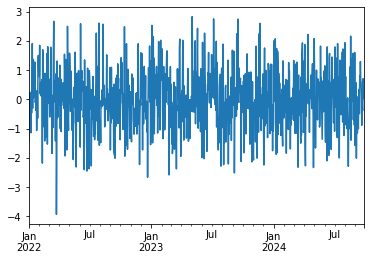

In [96]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2022", periods=1000))
ts.plot()

<AxesSubplot:>

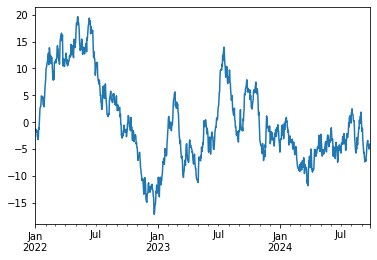

In [97]:
ts_cumsum = ts.cumsum()
ts_cumsum.plot()

If running under Jupyter Notebook, the plot will appear on `plot()`. Otherwise use `matplotlib.pyplot.show` to show it of `matplotlin.pyplot.savefig` to write it into a file.

In [98]:
plt.show()

On a DataFrame, the `plot()` method is a convenience to plot all of the columns with labels.

<Figure size 432x288 with 0 Axes>

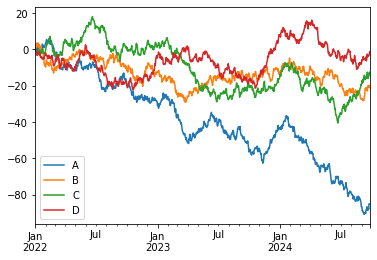

In [99]:
df = pd.DataFrame(
    np.random.randn(1000, 4),
    index=ts.index,
    columns=list("ABCD")
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc="best")

## Getting data in/out

### CSV

#### Writing to a .csv file

In [101]:
df.to_csv("files/foo.csv")

#### Reading from a .csv file

In [102]:
pd.read_csv("files/foo.csv")

,Unnamed: 0,A,B,C,D
0,2022-01-01,1.487934,1.095357,0.950583,-0.098050
1,2022-01-02,2.852137,1.269131,0.316036,-0.454367
2,2022-01-03,2.214553,0.837012,0.226380,-1.028280
3,2022-01-04,2.640947,3.354747,-0.490154,-1.063480
4,2022-01-05,0.696406,3.333828,-1.166323,-1.432614
...,...,...,...,...,...
995,2024-09-22,-87.925430,-20.619726,-14.835454,-3.408065
996,2024-09-23,-85.021481,-19.794701,-14.223107,-3.297645
997,2024-09-24,-85.085890,-20.662952,-12.675394,-2.405819
998,2024-09-25,-84.987709,-20.665676,-13.502361,-1.117808


### HDF5

Reading and writing to HDF5Stores.

#### Writing to a HDF5 Store.

In [103]:
# !pip install tables
df.to_hdf("files/foo.h5", "df")

#### Reading from HDF5 Store.

In [104]:
pd.read_hdf("files/foo.h5", "df")

,A,B,C,D
2022-01-01,1.487934,1.095357,0.950583,-0.098050
2022-01-02,2.852137,1.269131,0.316036,-0.454367
2022-01-03,2.214553,0.837012,0.226380,-1.028280
2022-01-04,2.640947,3.354747,-0.490154,-1.063480
2022-01-05,0.696406,3.333828,-1.166323,-1.432614
...,...,...,...,...
2024-09-22,-87.925430,-20.619726,-14.835454,-3.408065
2024-09-23,-85.021481,-19.794701,-14.223107,-3.297645
2024-09-24,-85.085890,-20.662952,-12.675394,-2.405819
2024-09-25,-84.987709,-20.665676,-13.502361,-1.117808


### Excel

Reading and writing to MS Excel.

#### Writing to an excel file

In [105]:
df.to_excel("files/foo.xlsx", sheet_name="Sheet1")

#### Reading from an excel file.

In [106]:
pd.read_excel("files/foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2022-01-01,1.487934,1.095357,0.950583,-0.098050
1,2022-01-02,2.852137,1.269131,0.316036,-0.454367
2,2022-01-03,2.214553,0.837012,0.226380,-1.028280
3,2022-01-04,2.640947,3.354747,-0.490154,-1.063480
4,2022-01-05,0.696406,3.333828,-1.166323,-1.432614
...,...,...,...,...,...
995,2024-09-22,-87.925430,-20.619726,-14.835454,-3.408065
996,2024-09-23,-85.021481,-19.794701,-14.223107,-3.297645
997,2024-09-24,-85.085890,-20.662952,-12.675394,-2.405819
998,2024-09-25,-84.987709,-20.665676,-13.502361,-1.117808
